In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, get_scorer
from sklearn.linear_model import Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('ml-09-k-means-animals-dataset.csv')

In [3]:
data.drop(columns=['Region', 'Stage', 'Comments', 'Individual ID', 'Date Egg'], inplace = True)

In [4]:
data.dropna(axis = 0, thresh = len(data.columns)/2, inplace=True)
data.dropna(axis = 1, thresh = len(data.columns)/2, inplace=True)

data.reset_index(drop = True, inplace = True)

In [5]:
continuous_columns = ['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
continuous_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
continuous_imputed_df = pd.DataFrame(continuous_imputer.fit_transform(data[continuous_columns]), columns=continuous_columns)


for col in continuous_columns:
    data[col] = continuous_imputed_df[col]
    
data.replace('.' , None ,inplace = True)
categorical_columns = ['Sex']
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputed_df = pd.DataFrame(categorical_imputer.fit_transform(data[categorical_columns]), columns=categorical_columns)

for col in categorical_columns:
    data[col] = categorical_imputed_df[col]
    

In [6]:
breakout = pd.get_dummies(data['Clutch Completion'])
breakout
breakout.drop(columns='No', inplace = True)
breakout.columns=['Clutch Completion - Yes']

breakout = pd.get_dummies(data['Island'])
breakout
breakout.drop(columns='Torgersen', inplace = True)
data = data.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(data['Sex'])
breakout
breakout.drop(columns='MALE', inplace = True)
data = data.merge(breakout, how = 'inner', left_index = True, right_index = True)


In [7]:
data.drop(columns = ['Island', 'Clutch Completion', 'Sex'], inplace = True, axis = 1)
data

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Biscoe,Dream,FEMALE
0,39.1,18.7,181.0,3750.0,8.733382,-25.686292,0,0,0
1,39.5,17.4,186.0,3800.0,8.949560,-24.694540,0,0,1
2,40.3,18.0,195.0,3250.0,8.368210,-25.333020,0,0,1
3,36.7,19.3,193.0,3450.0,8.766510,-25.324260,0,0,1
4,39.3,20.6,190.0,3650.0,8.664960,-25.298050,0,0,0
...,...,...,...,...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,7.991840,-26.205380,1,0,1
338,46.8,14.3,215.0,4850.0,8.411510,-26.138320,1,0,1
339,50.4,15.7,222.0,5750.0,8.301660,-26.041170,1,0,0
340,45.2,14.8,212.0,5200.0,8.242460,-26.119690,1,0,1


In [8]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)
data_scaled = pd.DataFrame(data = data_scaled, columns = data.columns)
data_scaled

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Biscoe,Dream,FEMALE
0,-0.884499,0.785449,-1.418347,-0.564142,0.000000,0.000000,-0.976875,-0.754193,-0.965507
1,-0.811126,0.126188,-1.062250,-0.501703,0.399456,1.271627,-0.976875,-0.754193,1.035725
2,-0.664380,0.430462,-0.421277,-1.188532,-0.674767,0.452966,-0.976875,-0.754193,1.035725
3,-1.324737,1.089724,-0.563715,-0.938776,0.061215,0.464198,-0.976875,-0.754193,1.035725
4,-0.847812,1.748985,-0.777373,-0.689020,-0.126430,0.497804,-0.976875,-0.754193,-0.965507
...,...,...,...,...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,-1.370226,-0.665577,1.023672,-0.754193,1.035725
338,0.527932,-1.445897,1.003109,0.809516,-0.594757,-0.579592,1.023672,-0.754193,1.035725
339,1.188289,-0.735923,1.501644,1.933419,-0.797739,-0.455026,1.023672,-0.754193,-0.965507
340,0.234440,-1.192335,0.789451,1.246590,-0.907129,-0.555705,1.023672,-0.754193,1.035725


In [9]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

kmeans.labels_
kmeans.cluster_centers_
label = kmeans.predict(data)

predSeries = pd.Series(label)
df2 = data.merge(predSeries.rename('Target'), how='inner', left_index=True, right_index=True)

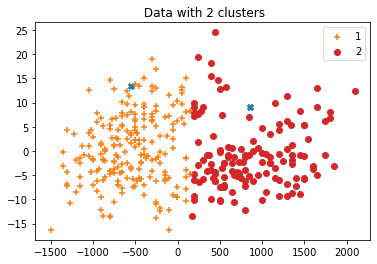

In [10]:
from sklearn.decomposition import PCA
import pylab as pl
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

clusters = pca.transform(kmeans.cluster_centers_)



for i in range(0, len(clusters)):
        c0 = pl.scatter(clusters[i,0],pca_2d[i,1],c='#1f77b4', marker='X')  
        
for i in range(0, pca_2d.shape[0]):
    if df2.Target.iloc[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#ff7f0e', marker='+')
    elif df2.Target.iloc[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#d62728',marker='o')
 
pl.legend([c1, c2], ['1', '2'])
pl.title(' Data with 2 clusters')
pl.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

label= kmeans.predict(data)

predSeries = pd.Series(label)
df2 = data.merge(predSeries.rename('Target'), how='inner', left_index=True, right_index=True)


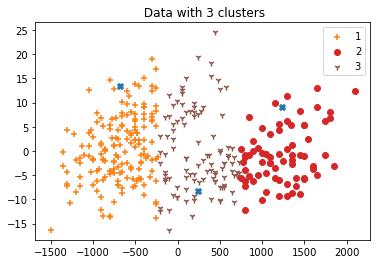

In [12]:
clusters = pca.transform(kmeans.cluster_centers_)

for i in range(0, len(clusters)):
        c0 = pl.scatter(clusters[i,0],pca_2d[i,1],c='#1f77b4', marker='X')  
        
for i in range(0, pca_2d.shape[0]):
    if df2.Target.iloc[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#ff7f0e', marker='+')
    elif df2.Target.iloc[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#d62728',marker='o')
    elif df2.Target.iloc[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#8c564b',marker='1')
 
pl.legend([c1, c2, c3], ['1', '2', '3'])
pl.title(' Data with 3 clusters')
pl.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

label= kmeans.predict(data)

predSeries = pd.Series(label)
df2 = data.merge(predSeries.rename('Target'), how='inner', left_index=True, right_index=True)


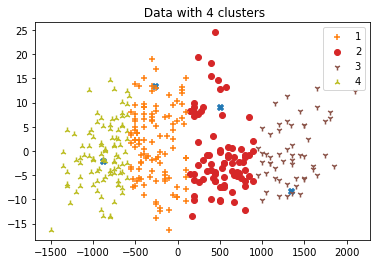

In [14]:
clusters = pca.transform(kmeans.cluster_centers_)

for i in range(0, len(clusters)):
        c0 = pl.scatter(clusters[i,0],pca_2d[i,1],c='#1f77b4', marker='X')  
        
for i in range(0, pca_2d.shape[0]):
    if df2.Target.iloc[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#ff7f0e', marker='+')
    elif df2.Target.iloc[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#d62728',marker='o')
    elif df2.Target.iloc[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#8c564b',marker='1')
    elif df2.Target.iloc[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#bcbd22',marker='2')
 
pl.legend([c1, c2, c3, c4], ['1', '2', '3', '4'])
pl.title(' Data with 4 clusters')
pl.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

label= kmeans.predict(data)

predSeries = pd.Series(label)
df2 = data.merge(predSeries.rename('Target'), how='inner', left_index=True, right_index=True)


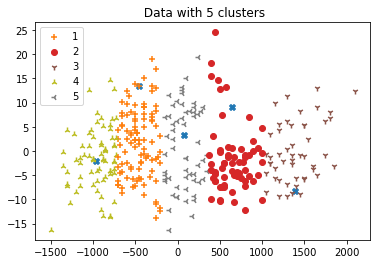

In [16]:
clusters = pca.transform(kmeans.cluster_centers_)

for i in range(0, len(clusters)):
        c0 = pl.scatter(clusters[i,0],pca_2d[i,1],c='#1f77b4', marker='X')  
        
for i in range(0, pca_2d.shape[0]):
    if df2.Target.iloc[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#ff7f0e', marker='+')
    elif df2.Target.iloc[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#d62728',marker='o')
    elif df2.Target.iloc[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#8c564b',marker='1')
    elif df2.Target.iloc[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#bcbd22',marker='2')
    elif df2.Target.iloc[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='#7f7f7f',marker='3')
 
 
pl.legend([c1, c2, c3, c4, c5], ['1', '2', '3', '4', '5'])
pl.title(' Data with 5 clusters')
pl.show()

In [17]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data)

kmeans.labels_
kmeans.cluster_centers_
kmeans.predict(data)



array([2, 2, 4, 2, 2, 2, 3, 2, 0, 4, 2, 4, 2, 3, 2, 2, 3, 4, 0, 2, 2, 2,
       0, 2, 2, 2, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 2, 4, 3, 4, 0, 4, 3, 4,
       3, 2, 4, 2, 0, 2, 0, 2, 0, 4, 2, 2, 2, 4, 2, 4, 3, 2, 0, 4, 0, 4,
       0, 4, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 3, 2, 0, 4, 2, 2, 2, 0,
       2, 2, 0, 2, 3, 4, 0, 2, 3, 4, 0, 2, 3, 4, 0, 4, 2, 2, 0, 4, 3, 2,
       3, 4, 0, 0, 0, 4, 2, 4, 4, 4, 2, 2, 0, 4, 0, 4, 0, 4, 0, 4, 2, 2,
       3, 2, 0, 4, 0, 2, 0, 2, 2, 4, 2, 4, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 4, 2, 0, 2, 2, 2, 2, 0, 2, 0, 4, 2, 2, 3, 2, 2, 4, 2, 4,
       0, 2, 2, 2, 3, 4, 0, 4, 0, 2, 0, 0, 3, 4, 3, 0, 2, 2, 2, 2, 3, 2,
       0, 4, 2, 4, 0, 2, 0, 4, 2, 4, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 3,
       1, 3, 1, 1, 3, 3, 5, 3, 5, 3, 1, 3, 1, 0, 1, 0, 1, 3, 5, 1, 5, 3,
       5, 5, 5, 0, 1, 3, 1, 5, 3, 5, 1, 5, 1, 5, 5, 3, 5, 0, 1, 0, 3, 1,
       5, 0, 1, 5, 5, 5, 5, 3, 5, 5, 5, 0, 5, 3, 1, 0, 5, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 5, 5, 5, 3, 1, 3, 1, 3, 1, 3, 1,

In [18]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data)

kmeans.labels_
kmeans.cluster_centers_
kmeans.predict(data)



array([1, 1, 5, 5, 1, 5, 0, 5, 2, 5, 1, 3, 1, 2, 1, 5, 2, 5, 2, 5, 5, 1,
       1, 1, 1, 5, 3, 3, 1, 5, 1, 5, 1, 5, 2, 1, 5, 5, 0, 3, 1, 3, 2, 3,
       0, 5, 3, 5, 2, 5, 2, 5, 1, 3, 1, 5, 1, 3, 1, 3, 2, 5, 1, 3, 1, 5,
       2, 3, 2, 5, 1, 5, 2, 1, 2, 1, 1, 5, 1, 3, 0, 1, 2, 5, 5, 1, 5, 1,
       5, 5, 2, 5, 2, 5, 2, 1, 2, 3, 2, 1, 0, 3, 2, 3, 5, 1, 1, 3, 0, 1,
       0, 3, 2, 1, 2, 3, 1, 5, 5, 3, 5, 5, 1, 3, 1, 5, 2, 3, 1, 5, 5, 5,
       2, 5, 1, 3, 1, 5, 2, 5, 5, 3, 1, 3, 1, 2, 5, 5, 1, 1, 1, 5, 1, 1,
       5, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 2, 5, 5, 3, 1, 5,
       2, 5, 1, 1, 0, 3, 2, 5, 2, 5, 1, 1, 0, 3, 2, 1, 1, 5, 5, 1, 2, 5,
       2, 5, 1, 5, 1, 5, 1, 5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 5, 1, 2, 1, 2,
       4, 2, 4, 6, 0, 0, 6, 2, 6, 0, 6, 0, 4, 2, 4, 2, 4, 0, 6, 4, 0, 2,
       0, 0, 6, 2, 4, 0, 6, 6, 0, 0, 4, 6, 6, 0, 6, 2, 6, 1, 4, 2, 0, 6,
       0, 2, 6, 6, 6, 0, 6, 2, 0, 0, 0, 2, 0, 2, 6, 2, 6, 2, 4, 0, 4, 0,
       4, 0, 6, 0, 0, 6, 6, 0, 4, 0, 4, 0, 4, 0, 6,

In [19]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(data)

kmeans.labels_
kmeans.cluster_centers_
kmeans.predict(data)



array([3, 3, 0, 0, 3, 3, 2, 0, 5, 0, 3, 4, 3, 5, 3, 0, 2, 0, 5, 0, 0, 3,
       3, 3, 3, 0, 4, 4, 3, 0, 3, 0, 3, 0, 5, 3, 0, 0, 2, 4, 3, 4, 5, 4,
       2, 0, 4, 0, 5, 0, 5, 0, 5, 4, 3, 0, 3, 4, 3, 4, 5, 0, 5, 4, 3, 0,
       5, 4, 2, 0, 3, 0, 5, 3, 5, 3, 3, 0, 3, 4, 2, 3, 5, 0, 0, 3, 0, 3,
       0, 0, 5, 0, 2, 0, 5, 3, 5, 4, 5, 3, 2, 4, 5, 4, 0, 3, 3, 4, 2, 3,
       2, 4, 5, 3, 5, 4, 3, 0, 0, 4, 0, 0, 3, 4, 3, 0, 5, 4, 3, 0, 0, 0,
       2, 0, 3, 4, 3, 0, 5, 0, 0, 4, 3, 4, 3, 5, 0, 0, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 0, 3, 5, 3, 3, 3, 3, 5, 0, 5, 0, 3, 0, 5, 0, 0, 4, 3, 0,
       5, 0, 3, 3, 2, 4, 5, 0, 5, 0, 3, 3, 2, 4, 2, 3, 3, 0, 0, 3, 2, 0,
       5, 0, 3, 0, 3, 0, 5, 0, 0, 0, 5, 3, 0, 3, 3, 3, 3, 0, 3, 5, 3, 2,
       7, 2, 7, 1, 2, 2, 6, 5, 6, 2, 1, 2, 7, 5, 7, 5, 7, 2, 1, 7, 6, 5,
       6, 6, 6, 5, 7, 2, 1, 1, 2, 6, 7, 6, 1, 6, 1, 5, 1, 3, 7, 5, 2, 1,
       6, 5, 1, 6, 1, 6, 1, 5, 6, 6, 6, 5, 6, 2, 1, 5, 1, 5, 7, 2, 7, 2,
       7, 2, 1, 2, 6, 6, 6, 2, 7, 2, 7, 2, 7, 2, 1,

In [20]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(data)

kmeans.labels_
kmeans.cluster_centers_
kmeans.predict(data)



array([7, 7, 2, 2, 7, 7, 3, 2, 4, 2, 7, 5, 7, 4, 7, 2, 4, 2, 4, 2, 7, 7,
       0, 7, 7, 7, 5, 5, 0, 2, 0, 2, 0, 2, 0, 0, 7, 2, 3, 5, 0, 5, 4, 5,
       3, 2, 5, 2, 0, 2, 4, 2, 0, 5, 7, 7, 7, 5, 7, 5, 4, 7, 0, 5, 0, 2,
       0, 5, 4, 7, 0, 7, 0, 7, 4, 7, 0, 7, 0, 5, 3, 7, 4, 2, 7, 7, 2, 0,
       7, 7, 4, 2, 4, 2, 4, 7, 4, 5, 0, 7, 3, 5, 4, 5, 7, 7, 0, 5, 3, 7,
       3, 5, 4, 0, 0, 5, 7, 2, 2, 5, 2, 2, 0, 5, 0, 2, 4, 5, 0, 2, 2, 2,
       4, 2, 0, 5, 0, 2, 4, 2, 2, 5, 7, 5, 7, 4, 2, 2, 7, 7, 0, 2, 0, 7,
       2, 7, 0, 2, 7, 0, 7, 7, 7, 7, 0, 7, 0, 2, 7, 2, 4, 7, 2, 5, 7, 2,
       0, 2, 7, 7, 3, 5, 4, 2, 0, 7, 0, 0, 3, 5, 4, 0, 7, 7, 2, 7, 4, 2,
       4, 2, 7, 2, 0, 7, 0, 2, 2, 2, 0, 7, 2, 0, 7, 7, 0, 2, 7, 0, 7, 4,
       1, 4, 1, 1, 3, 3, 8, 4, 8, 3, 1, 3, 6, 4, 6, 0, 6, 3, 1, 1, 8, 4,
       8, 8, 8, 0, 1, 3, 1, 8, 3, 8, 6, 8, 1, 8, 8, 4, 1, 0, 1, 4, 3, 1,
       8, 4, 1, 8, 1, 3, 1, 4, 8, 8, 8, 4, 8, 4, 1, 4, 1, 4, 1, 3, 1, 3,
       6, 3, 1, 3, 8, 8, 8, 3, 6, 3, 6, 3, 6, 3, 1,

C:\Users\kaigu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


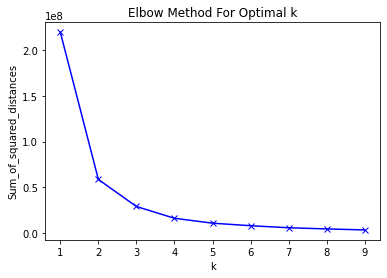

In [21]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()